In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.utils import shuffle


In [2]:
df=pd.read_csv('artifacts/dataset/diabetes.csv')

In [3]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
(df==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [8]:
# Replacing 0s with NaN for specific columns
cols_with_zero_as_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero_as_missing] = df[cols_with_zero_as_missing].replace(0, np.nan)
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [9]:
# Imputing missing values with median

for col in cols_with_zero_as_missing:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)  

C:\Users\Spearhub\AppData\Local\Temp\ipykernel_8504\1068524401.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
C:\Users\Spearhub\AppData\Local\Temp\ipykernel_8504\1068524401.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
# Shuffling the dataset
df = shuffle(df, random_state=42)

In [12]:
# Column 'Outcome' is the target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X.shape, y.shape

((768, 8), (768,))

In [13]:
# Stratification keeps class ratios identical in both sets.

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [35]:
rf = RandomForestClassifier(random_state=42)


In [36]:
param_dist = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False],
}


In [37]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring="accuracy",
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'bootstrap': [True, False], 'max_depth': [None, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",20
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here..

In [38]:
best_rf = random_search.best_estimator_

y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

print("Best Params:", random_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best Params: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5, 'bootstrap': True}
Accuracy: 0.7662337662337663
ROC AUC: 0.8692592592592593

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.94      0.84       100
           1       0.80      0.44      0.57        54

    accuracy                           0.77       154
   macro avg       0.78      0.69      0.71       154
weighted avg       0.77      0.77      0.75       154



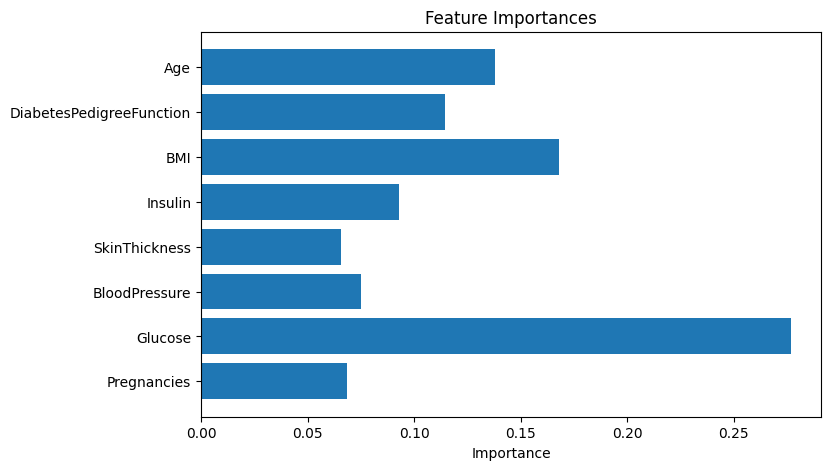

In [30]:
import matplotlib.pyplot as plt

importances = best_rf.feature_importances_
features = X.columns

plt.figure(figsize=(8, 5))
plt.barh(features, importances)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.show()


### Insights

The model is good at identifying the negatives, but struggles at positives.

Outcome: 0 = No Diabetes
Outcome: 1 = Diabetes

### Our Model Stats:

- Class 0 recall = 0.94 → It almost never mislabels healthy people.
- Class 1 recall = 0.44 → It misses more than half of the diabetic cases.

### Verdict:

- This is the classic imbalance problem. The data has far more zeros than ones, and models naturally drift toward predicting the majority class unless you intervene.

- Even though accuracy looks fine (75%), accuracy is misleading here. The ROC AUC (0.87) is actually solid, which means the model can distinguish between classes. It just needs threshold tuning and/or better handling of the class imbalance.

In [39]:
# Let's try with class_weight balanced

rf = RandomForestClassifier(class_weight="balanced", random_state=42)

In [40]:
param_dist = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False],
}


In [41]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring="recall",   # our goal is detecting diabetics
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'bootstrap': [True, False], 'max_depth': [None, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",20
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'recall'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... 

In [42]:
best_rf = random_search.best_estimator_

y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

print("Best Params:", random_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best Params: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 5, 'bootstrap': False}
Accuracy: 0.7532467532467533
ROC AUC: 0.8481481481481481

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.81       100
           1       0.64      0.69      0.66        54

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.76       154



### Verdict:

- We can observe a big improvement. 
- The recall-optimized model (0.79 / 0.69) is better because it generalizes more fairly and catches far more of the cases that matter.
- Changes: classifier="balanced" in  `RandomForestClassifier` and scoring="recall" in `RandomizedSearchCV`

## Trails

- Let's try Gradient Boosting [CatBoost, LightGBM, and XGBoost]

### 

In [43]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(
    iterations=500,
    learning_rate=0.03,
    depth=6,
    loss_function="Logloss",
    eval_metric="AUC",
    verbose=False,
    random_state=42
)

cat.fit(X_train, y_train)

cat_pred = cat.predict(X_test)
cat_proba = cat.predict_proba(X_test)[:,1]
print("CatBoost Classifier Results:")
print("Accuracy:", accuracy_score(y_test, cat_pred))
print("ROC AUC:", roc_auc_score(y_test, cat_proba))
print("\nClassification Report:\n", classification_report(y_test, cat_pred))    

CatBoost Classifier Results:
Accuracy: 0.7597402597402597
ROC AUC: 0.8592592592592593

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.92      0.83       100
           1       0.76      0.46      0.57        54

    accuracy                           0.76       154
   macro avg       0.76      0.69      0.70       154
weighted avg       0.76      0.76      0.74       154



In [45]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.03,
    max_depth=6,
    random_state=42,
    force_col_wise=True,
)

lgb.fit(X_train, y_train)

lgb_pred = lgb.predict(X_test)
lgb_proba = lgb.predict_proba(X_test)[:,1]
print("LightGBM Classifier Results:")
print("Accuracy:", accuracy_score(y_test, lgb_pred))
print("ROC AUC:", roc_auc_score(y_test, lgb_proba))
print("\nClassification Report:\n", classification_report(y_test, lgb_pred))


[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [46]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.03,
    max_depth=5,
    subsample=0.9,
    colsample_bytree=0.9,
    eval_metric="logloss",
    random_state=42
)

xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)
xgb_proba = xgb.predict_proba(X_test)[:,1]
print("XGBoost Classifier Results:")
print("Accuracy:", accuracy_score(y_test, xgb_pred))    
print("ROC AUC:", roc_auc_score(y_test, xgb_proba))
print("\nClassification Report:\n", classification_report(y_test, xgb_pred))

XGBoost Classifier Results:
Accuracy: 0.7792207792207793
ROC AUC: 0.8492592592592593

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.54      0.63        54

    accuracy                           0.78       154
   macro avg       0.77      0.72      0.74       154
weighted avg       0.78      0.78      0.77       154



## Final Results

In [54]:
print("CatBoost Classifier Results:")
print("Accuracy:", accuracy_score(y_test, cat_pred))
print("ROC AUC:", roc_auc_score(y_test, cat_proba))
print("\nClassification Report:\n", classification_report(y_test, cat_pred))  

print("="*50)

print("LightGBM Classifier Results:")
print("Accuracy:", accuracy_score(y_test, lgb_pred))
print("ROC AUC:", roc_auc_score(y_test, lgb_proba))
print("\nClassification Report:\n", classification_report(y_test, lgb_pred))


print("="*50)
print("XGBoost Classifier Results:")
print("Accuracy:", accuracy_score(y_test, xgb_pred))    
print("ROC AUC:", roc_auc_score(y_test, xgb_proba))
print("\nClassification Report:\n", classification_report(y_test, xgb_pred))


CatBoost Classifier Results:
Accuracy: 0.7597402597402597
ROC AUC: 0.8592592592592593

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.92      0.83       100
           1       0.76      0.46      0.57        54

    accuracy                           0.76       154
   macro avg       0.76      0.69      0.70       154
weighted avg       0.76      0.76      0.74       154

LightGBM Classifier Results:
Accuracy: 0.7467532467532467
ROC AUC: 0.8342592592592594

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82       100
           1       0.69      0.50      0.58        54

    accuracy                           0.75       154
   macro avg       0.73      0.69      0.70       154
weighted avg       0.74      0.75      0.74       154

XGBoost Classifier Results:
Accuracy: 0.7792207792207793
ROC AUC: 0.8492592592592593

Classification Report:
               

## Verdict:
- XGBoost is the only one of the three that pushes meaningfully closer to balanced performance without collapsing precision.
- Even XGBoost is still underperforming compared to our recall-optimized Random Forest, which got:

class 1 recall: 0.69

class 1 f1: 0.66

Our recall-optimized RF is still the best model for minority detection.

## Future Directions:
- Try adjusting the scale_pos_weight, max_depth, min_child_weight, regularization strength (gamma, lambda).
- Try with SMOTE for Balancing data before training(sometimes improves depth-limited models).